In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
file = 'fake_job_postings.csv'
df = pd.read_csv(file)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
len(df.columns)

18

In [6]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
# null values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
# in fake job postings, some data is missing due to which the job becomes suspicious. removing null values 
# from the dataset is not a good idea. so we replace all with '' in the dataset
df = df.fillna('')

In [9]:
# null values
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

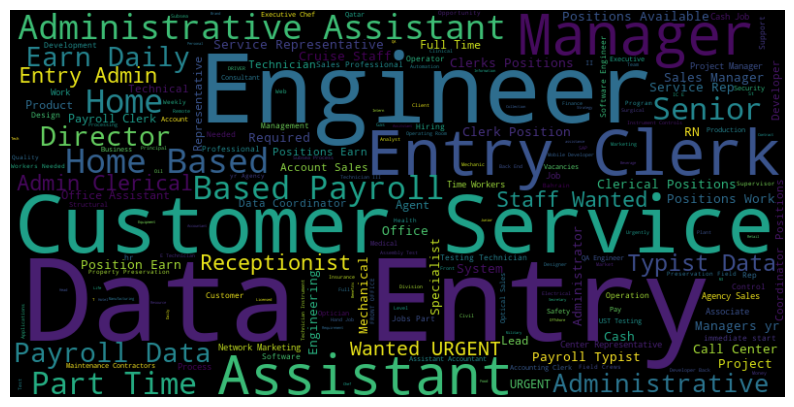

In [10]:
# a wordcloud of title where fradulent is 1
text = ' '.join(df[df['fraudulent'] == 1]['title'].values)
wc = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

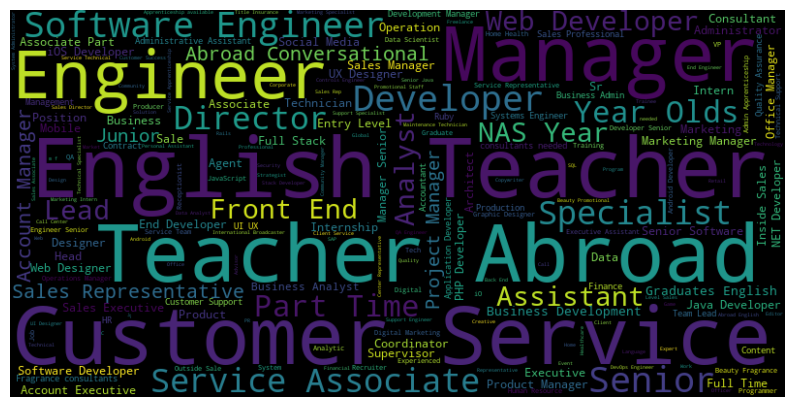

In [11]:
# a wordcloud of title where fradulent is 0
text = ' '.join(df[df['fraudulent'] == 0]['title'].values)
wc = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# so based on the length of text and categorical columns, 
# we have selected:
# title, location, department, salary_range, telecommuting, has_company_logo, has_questions, 
# employment_type, required_experience, required_education, industry, function

# lets see the value counts of these columns
# df['title'].value_counts()
#print the title where value count is 1
print(len(df['title'].value_counts().loc[lambda x : x==1]))
# when title is lowered
print(len(df['title'].str.lower().value_counts().loc[lambda x : x==1]))

#when splitted by space, removed punctuation and lowered and joined by space
print(len(df['title'].str.split().str.join(' ').str.replace('[^\w\s]', '').str.lower().value_counts().loc[lambda x : x==1]))

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# when splitted by space, removed punctuation, lowered, lemmatized and joined by space
print(len(df['title'].str.split().str.join(' ').str.replace('[^\w\s]', '').str.lower().apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])).value_counts().loc[lambda x : x==1]))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

print(len(df['title'].str.lower()
                  .str.replace('[^\w\s]', '')
                  .apply(remove_stopwords)
                  .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
                  .value_counts()
                  .loc[lambda x: x == 1]))
print(len(df['title'].str.lower()
                  .str.replace('[^\w\s]', '')
                  .apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
                  .value_counts()
                  .loc[lambda x: x == 1]))
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

print(len(df['title'].str.lower()
                  .str.replace('[^\w\s]', '')
                  .apply(remove_short_words)
                  .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
                  .value_counts()
                  .loc[lambda x: x == 1]))

def synonym_replacement(word):
    synonyms = wordnet.synsets(word)
    if synonyms:
        return synonyms[0].lemmas()[0].name()
    return word

print(len(df['title'].str.lower()
                  .str.replace('[^\w\s]', '')
                  .apply(lambda x: ' '.join([synonym_replacement(word) for word in x.split()]))
                  .value_counts()
                  .loc[lambda x: x == 1]))

print(len(df['title'].str.lower()
                  .str.replace('[^\w\s]', '')
                  .str.replace('\d+', '')
                  .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
                  .value_counts()
                  .loc[lambda x: x == 1]))

def get_ngrams(text, n=2):
    try:
        vectorizer = CountVectorizer(ngram_range=(n, n))
        ngrams = vectorizer.fit_transform([text])
        a = ' '.join(vectorizer.get_feature_names_out())
    except:
        return text
    return a

# Apply bigram analysis
print(len(df['title'].str.lower()
                 .str.replace('[^\w\s]', '', regex=True)
                 .apply(lambda x: get_ngrams(x, n=2))
                 .value_counts()
                 .loc[lambda x: x == 1]))

# Apply trigram analysis
print(len(df['title'].str.lower()
                 .str.replace('[^\w\s]', '', regex=True)
                 .apply(lambda x: get_ngrams(x, n=3))
                 .value_counts()
                 .loc[lambda x: x == 1]))

print(len(df['title'].str.lower()
                 .str.replace('[^\w\s]', '', regex=True)
                 .apply(lambda x: get_ngrams(x, n=3))
                 .value_counts()
                 .loc[lambda x: x == 1]))

9501
9278
8938
8846
8790
8783
8545
8788
8846
8752
8904
8904


In [13]:
# based on reduction of unique values we have identified a suitable stratergy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define preprocessing functions
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

def get_ngrams(text, n=2):
    try:
        vectorizer = CountVectorizer(ngram_range=(n, n))
        ngrams = vectorizer.fit_transform([text])
        return ' '.join(vectorizer.get_feature_names_out())
    except:
        return text

processed_titles = (df['title']
                   .str.lower()  # Lowercasing
                   .str.replace('[^\w\s]', '', regex=True)  # Punctuation removal
                   .str.replace('\d+', '', regex=True)  # Number removal
                   .apply(remove_stopwords)  # Stopword removal
                   .apply(remove_short_words)  # Short word removal
                   .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))  # Lemmatization
                   .apply(lambda x: get_ngrams(x, n=2))  # Bigram analysis
                   )

unique_titles_count = len(processed_titles.value_counts().loc[lambda x: x == 1])
print(unique_titles_count)

8136


In [17]:
# location
print(len(df['location'].value_counts().loc[lambda x: x == 1]))
# seperate by commans ans select only the last index, lower it and apply the same stratergy as title
processed_locations = (df['location']
                       .str.split(',').str[-1]
                       .str.lower()
                       .str.replace('[^\w\s]', '', regex=True)
                       .str.replace('\d+', '', regex=True)
                       .apply(remove_stopwords)
                       .apply(remove_short_words)
                       .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
                       .apply(lambda x: get_ngrams(x, n=2))
                       )

unique_locations_count = len(processed_locations.value_counts().loc[lambda x: x == 1])
print(unique_locations_count)

1614
828


In [18]:
# department
print(len(df['department'].value_counts().loc[lambda x: x == 1]))
processed_departments = (df['department']
                            .str.lower()
                            .str.replace('[^\w\s]', '', regex=True)
                            .str.replace('\d+', '', regex=True)
                            .apply(remove_stopwords)
                            .apply(remove_short_words)
                            .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
                            .apply(lambda x: get_ngrams(x, n=2))
                            )

unique_departments_count = len(processed_departments.value_counts().loc[lambda x: x == 1])
print(unique_departments_count)

815
651


In [19]:
# salary_range
df['salary_range'].value_counts()

salary_range
                 15012
0-0                142
40000-50000         66
30000-40000         55
45000-67000         37
                 ...  
55000-69000          1
360000-500000        1
50000-95000          1
16-20                1
140-160              1
Name: count, Length: 875, dtype: int64

In [22]:
# merge empty salary range with 0-0
df['salary_range'] = df['salary_range'].replace('', '0-0')
df['salary_range'].value_counts()

# we make this string and not need to apply any stratergy
processed_salary_ranges = df['salary_range'].astype(str)


In [23]:
# employment_type	required_experience	required_education	industry	function all are str

print(df['employment_type'].value_counts())
print(df['required_experience'].value_counts())
print(df['required_education'].value_counts())
print(df['industry'].value_counts())
print(df['function'].value_counts()) 

employment_type
Full-time    11620
              3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64
required_experience
                    7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64
required_education
                                     8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree              

In [36]:
# we can apply our stratergy to industry
print(df['industry'].value_counts())
print(len(df['industry'].value_counts().loc[lambda x: x == 1]))
# print all industries where value count is 1
# print(df['industry'].value_counts().loc[lambda x: x == 2])
processed_industries = (df['industry']
                        .str.lower()
                        .str.replace('[^\w\s]', '', regex=True)
                        .str.replace('\d+', '', regex=True)
                        .apply(remove_stopwords)
                        .apply(remove_short_words)
                        .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
                        .apply(lambda x: get_ngrams(x, n=2))
                        )

unique_industries_count = len(processed_industries.value_counts().loc[lambda x: x == 1])
print(unique_industries_count)

industry
                                       4903
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
                                       ... 
Sporting Goods                            1
Museums and Institutions                  1
Shipbuilding                              1
Alternative Dispute Resolution            1
Ranching                                  1
Name: count, Length: 132, dtype: int64
6
6


In [42]:
# benefits
print(df['benefits'].value_counts())

# we can apply our stratergy to benefits
print(df['benefits'].value_counts())

processed_benefits = (df['benefits']
                        .str.lower()
                        .str.replace('[^\w\s]', '', regex=True)
                        .str.replace('\d+', '', regex=True)
                        .apply(remove_stopwords)
                        .apply(remove_short_words)
                        .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
                        .apply(lambda x: get_ngrams(x, n=2))
                        )

unique_benefits_count = len(processed_benefits.value_counts().loc[lambda x: x == 1])
print(unique_benefits_count)

# we will not consider benfiets as its too large text

benefits
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             7212
See job description                                                                                                          

In [38]:
df.head(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,0-0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0


In [43]:
# our preprocessed cols: processed_titles, processed_locations, processed_departments, processed_salary_ranges, processed_industries
# we will have to encode them
# our other columns: telecommuting, has_company_logo, has_questions
# total columns: # title, location, department, salary_range, telecommuting, has_company_logo, has_questions, 
# employment_type, required_experience, required_education, industry, function

# so we make a final dataset with these columns and their preprocessed versions if any

cleaned_df = pd.DataFrame()
cleaned_df['title'] = processed_titles
cleaned_df['location'] = processed_locations
cleaned_df['department'] = processed_departments
cleaned_df['salary_range'] = processed_salary_ranges
cleaned_df['employment_type'] = df['employment_type']
cleaned_df['required_experience'] = df['required_experience']
cleaned_df['required_education'] = df['required_education']
cleaned_df['industry'] = processed_industries
cleaned_df['function'] = df['function']
cleaned_df['telecommuting'] = df['telecommuting']
cleaned_df['has_company_logo'] = df['has_company_logo']
cleaned_df['has_questions'] = df['has_questions']
cleaned_df['fraudulent'] = df['fraudulent']


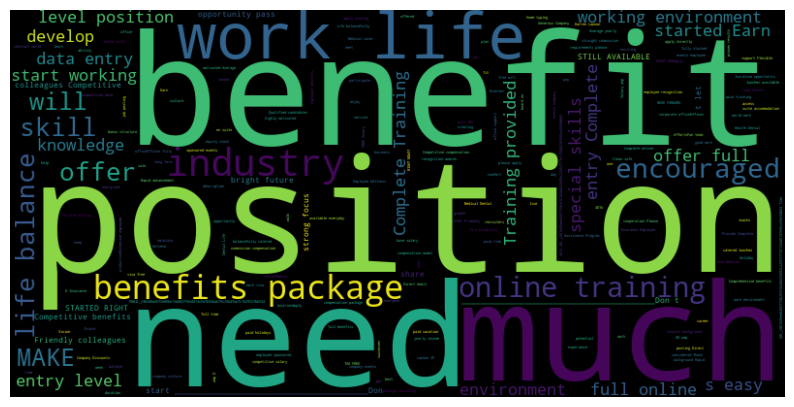

In [40]:
# word cloud of benefits where fradulent is 1 and 0

text = ' '.join(df[df['fraudulent'] == 1]['benefits'].values)
wc = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

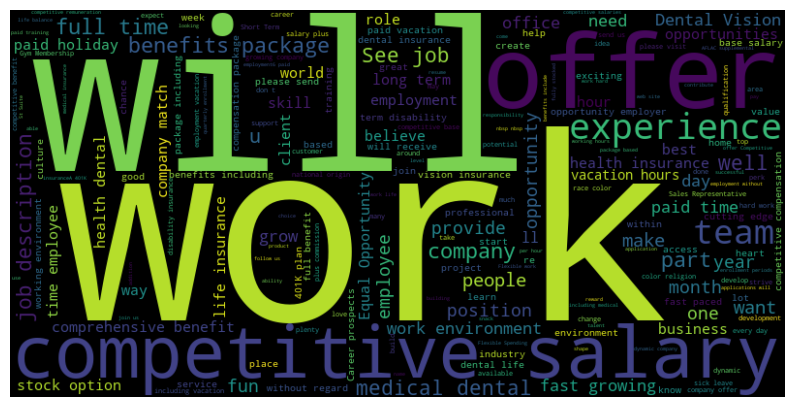

In [41]:
text = ' '.join(df[df['fraudulent'] == 0]['benefits'].values)
wc = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
cleaned_df.head()

,title,location,department,salary_range,employment_type,required_experience,required_education,industry,function,telecommuting,has_company_logo,has_questions,fraudulent
0,marketing intern,new york,marketing,0-0,other,internship,,,marketing,0,1,0,0
1,cloud video customer service service cloud vid...,auckland,success,0-0,full-time,not applicable,,marketing advertising,customer service,0,1,0,0
2,assistant cma commissioning machinery machiner...,wever,,0-0,,,,,,0,1,0,0
3,account executive executive washington,washington,sale,0-0,full-time,mid-senior level,bachelor's degree,computer software,sales,0,1,0,0
4,bill review review manager,fort worth,,0-0,full-time,mid-senior level,bachelor's degree,health care hospital health,health care provider,0,1,1,0


In [45]:
#lower all text columns
cleaned_df = cleaned_df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

In [47]:
text_columns = cleaned_df.select_dtypes(include='object').columns
text_columns
    

Index(['title', 'location', 'department', 'salary_range', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in text_columns:
    cleaned_df[f'enc_{col}'] = label_encoder.fit_transform(cleaned_df[col])

In [49]:
cleaned_df.head()

,title,location,department,salary_range,employment_type,required_experience,required_education,industry,function,telecommuting,...,fraudulent,enc_title,enc_location,enc_department,enc_salary_range,enc_employment_type,enc_required_experience,enc_required_education,enc_industry,enc_function
0,marketing intern,new york,marketing,0-0,other,internship,,,marketing,0,...,0,8060,1249,685,0,3,5,0,0,23
1,cloud video customer service service cloud vid...,auckland,success,0-0,full-time,not applicable,,marketing advertising,customer service,0,...,0,3236,115,998,0,2,7,0,79,8
2,assistant cma commissioning machinery machiner...,wever,,0-0,,,,,,0,...,0,1536,1898,0,0,0,0,0,0,0
3,account executive executive washington,washington,sale,0-0,full-time,mid-senior level,bachelor's degree,computer software,sales,0,...,0,133,1852,908,0,2,6,2,24,32
4,bill review review manager,fort worth,,0-0,full-time,mid-senior level,bachelor's degree,health care hospital health,health care provider,0,...,0,2201,658,0,0,2,6,2,53,17


In [50]:
final_df = cleaned_df.drop(text_columns, axis=1)
final_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,enc_title,enc_location,enc_department,enc_salary_range,enc_employment_type,enc_required_experience,enc_required_education,enc_industry,enc_function
0,0,1,0,0,8060,1249,685,0,3,5,0,0,23
1,0,1,0,0,3236,115,998,0,2,7,0,79,8
2,0,1,0,0,1536,1898,0,0,0,0,0,0,0
3,0,1,0,0,133,1852,908,0,2,6,2,24,32
4,0,1,1,0,2201,658,0,0,2,6,2,53,17


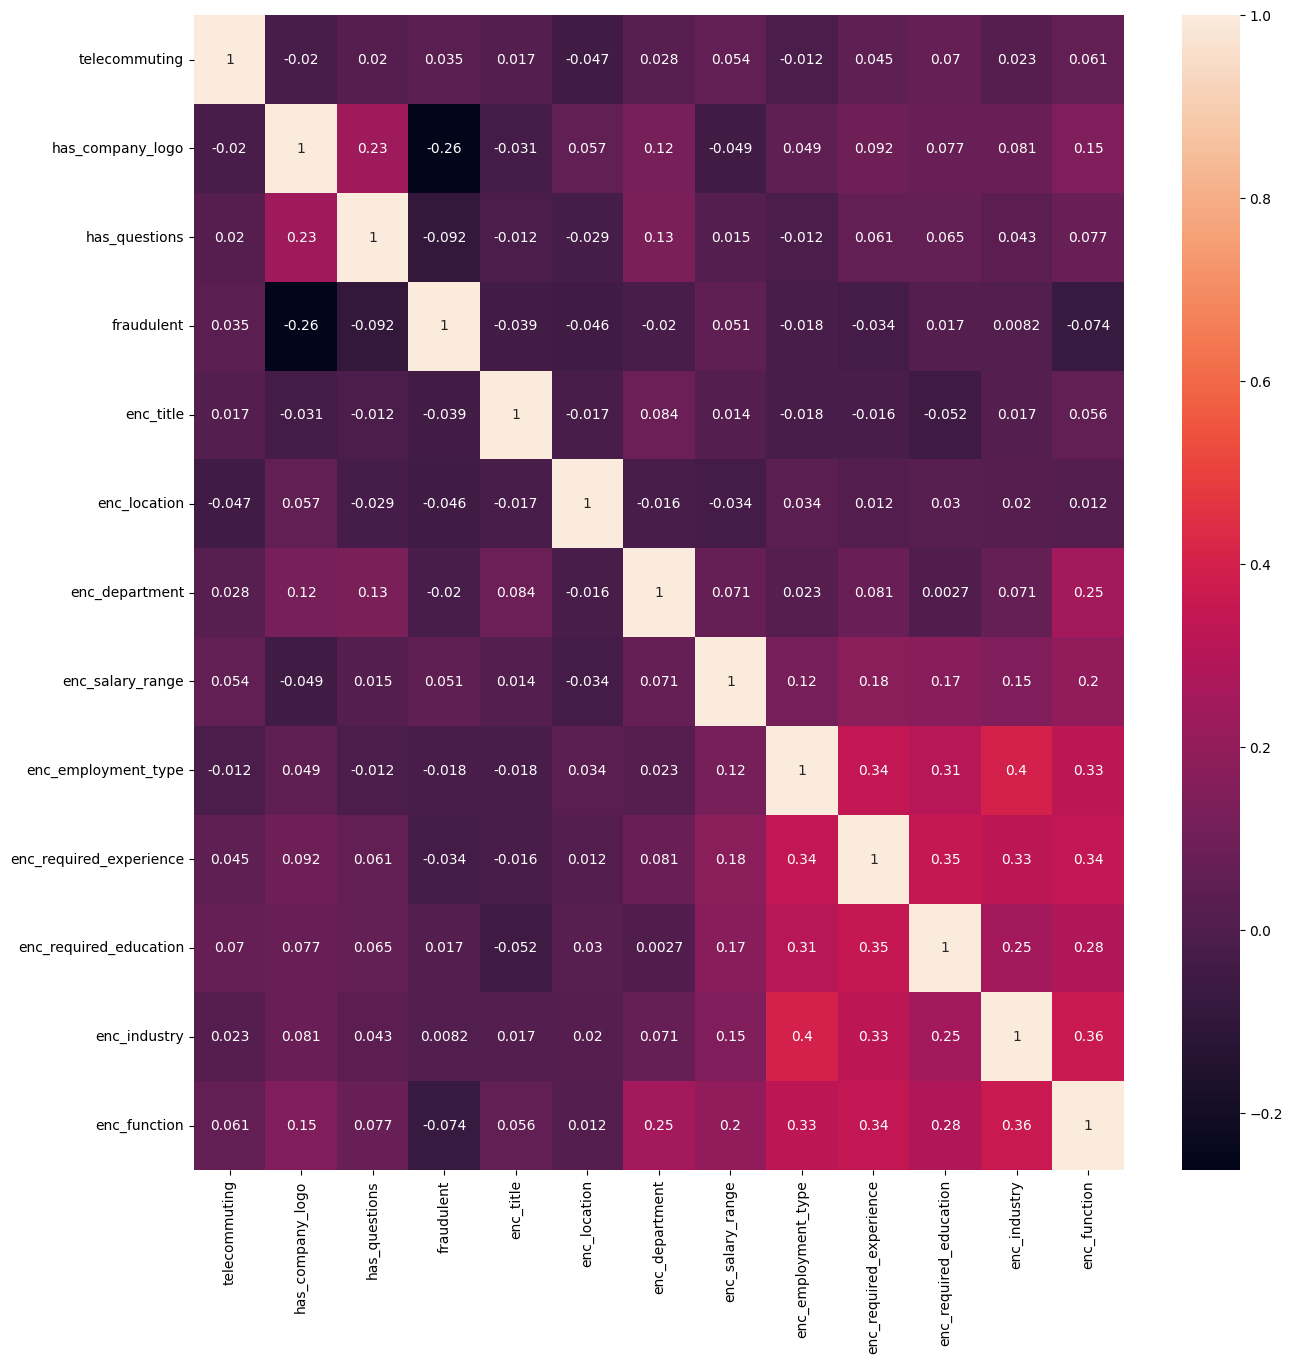

In [53]:
# sns to create a co

In [144]:
# train test split and decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = final_df.drop('fraudulent', axis=1)
y = final_df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9605704697986577

In [145]:
# modify hyper parameters
clf = DecisionTreeClassifier(random_state=42, max_depth=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9653243847874721

In [146]:
# logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9488255033557047

In [147]:
# change hyperparameters
clf = LogisticRegression(random_state=42, max_iter=1000, C=0.1, solver='saga', penalty='l2')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

d:\.MCA\sem4\ml\.env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9496644295302014